# Movie Data Set Notebook 2 -- Poster Stuff

In [1]:
# General imports here.
%matplotlib inline

In [2]:
%run -i base_movie_df_generation

Cleaning up JSON objects . . . may take a while
NaNs in movie_df? False
             budget     homepage       revenue      runtime  vote_average
count  5.443000e+03  5443.000000  5.443000e+03  5443.000000   5443.000000
mean   3.114843e+07     0.356237  9.026193e+07   109.981995      6.274904
std    4.004329e+07     0.478931  1.658673e+08    21.594643      0.921708
min    2.500000e+03     0.000000  1.378000e+03     0.000000      0.000000
25%    5.500000e+06     0.000000  7.315342e+06    95.000000      5.700000
50%    1.700000e+07     0.000000  3.003939e+07   106.000000      6.300000
75%    4.000000e+07     1.000000  9.898360e+07   120.000000      6.900000
max    3.800000e+08     1.000000  2.787965e+09   338.000000      9.100000



Getting the most frequent color in all posters . . .
This takes a long time too.


New Features (Genres): (5349, 18)
movie_df with Genres:  (5443, 39)
(5443, 39)
(5432, 39)


In [3]:
# tagline: Until we actually analyze the taglines, I think we should just replace with a tag_presence binary variable
movie_df.head().transpose()

id,5,11,12,13,14
belongs_to_collection,0,Star Wars Collection,Finding Nemo Collection,0,0
budget,4000000,11000000,94000000,55000000,15000000
homepage,0,1,1,0,1
originally_english,1,1,1,1,1
overview,It's Ted the Bellhop's first night on the job....,Princess Leia is captured and held hostage by ...,"Nemo, an adventurous young clownfish, is unexp...",A man with a low IQ has accomplished great thi...,"Lester Burnham, a depressed suburban father in..."
poster_path,http://image.tmdb.org/t/p/w185/eQs5hh9rxrk1m4x...,http://image.tmdb.org/t/p/w185/btTdmkgIvOi0FFi...,http://image.tmdb.org/t/p/w185/syPWyeeqzTQIxjI...,http://image.tmdb.org/t/p/w185/yE5d3BUhE8hCnkM...,http://image.tmdb.org/t/p/w185/or1MP8BZIAjqWYx...
production_companies,"[Miramax Films, A Band Apart]","[Lucasfilm, Twentieth Century Fox Film Corpora...",[Pixar Animation Studios],[Paramount Pictures],"[DreamWorks SKG, Jinks/Cohen Company]"
produced_in_us,1,1,1,1,1
release_date,12/9/1995,5/25/1977,5/30/2003,7/6/1994,9/15/1999
revenue,4.3e+06,7.75398e+08,9.40336e+08,6.77945e+08,3.56297e+08


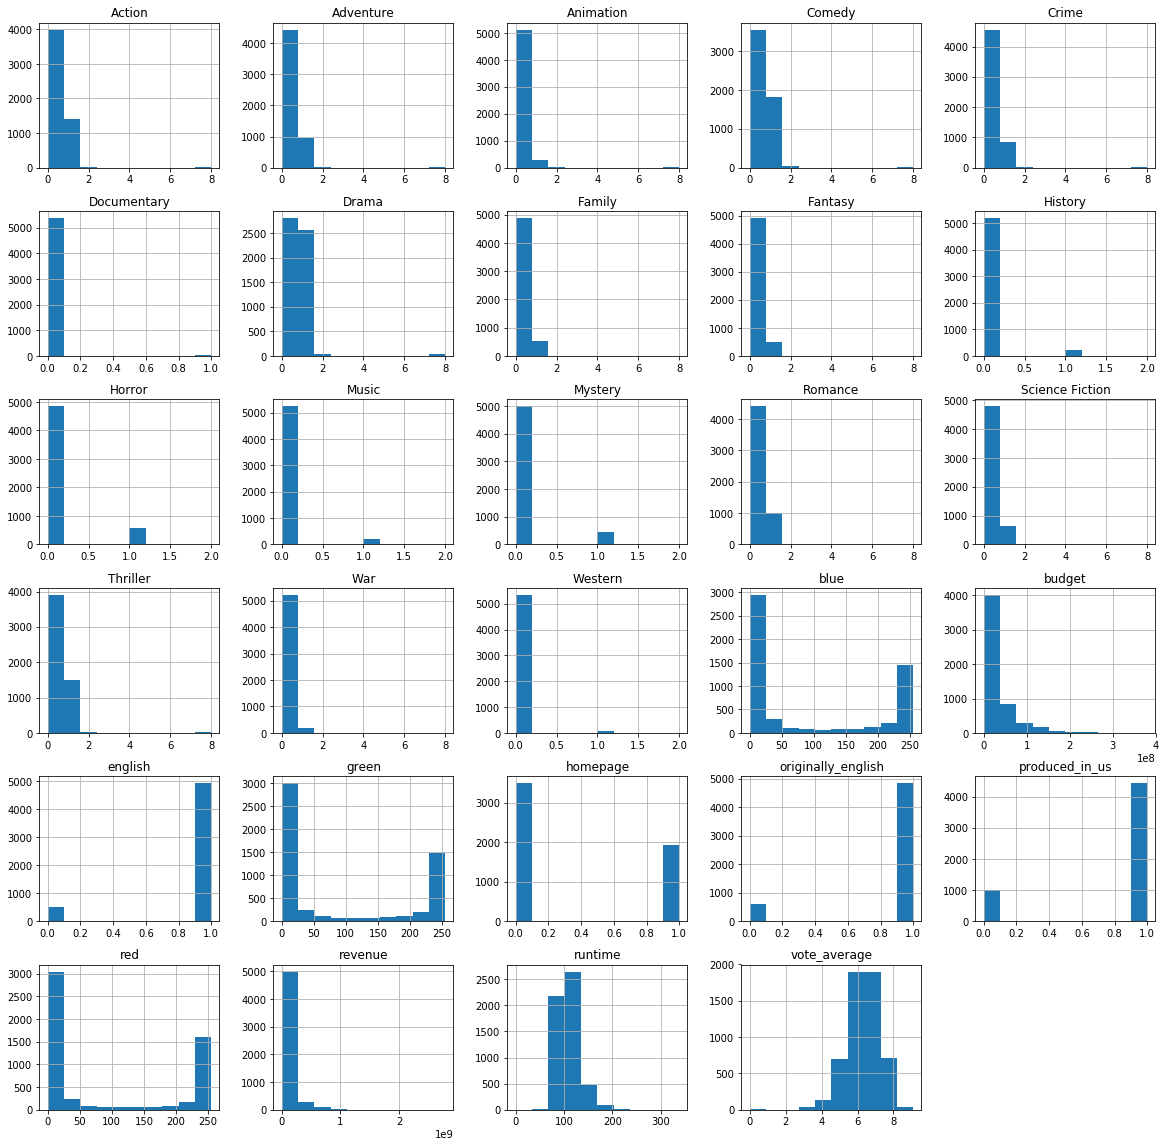

In [8]:
_ = movie_df.hist(figsize=(20,20))

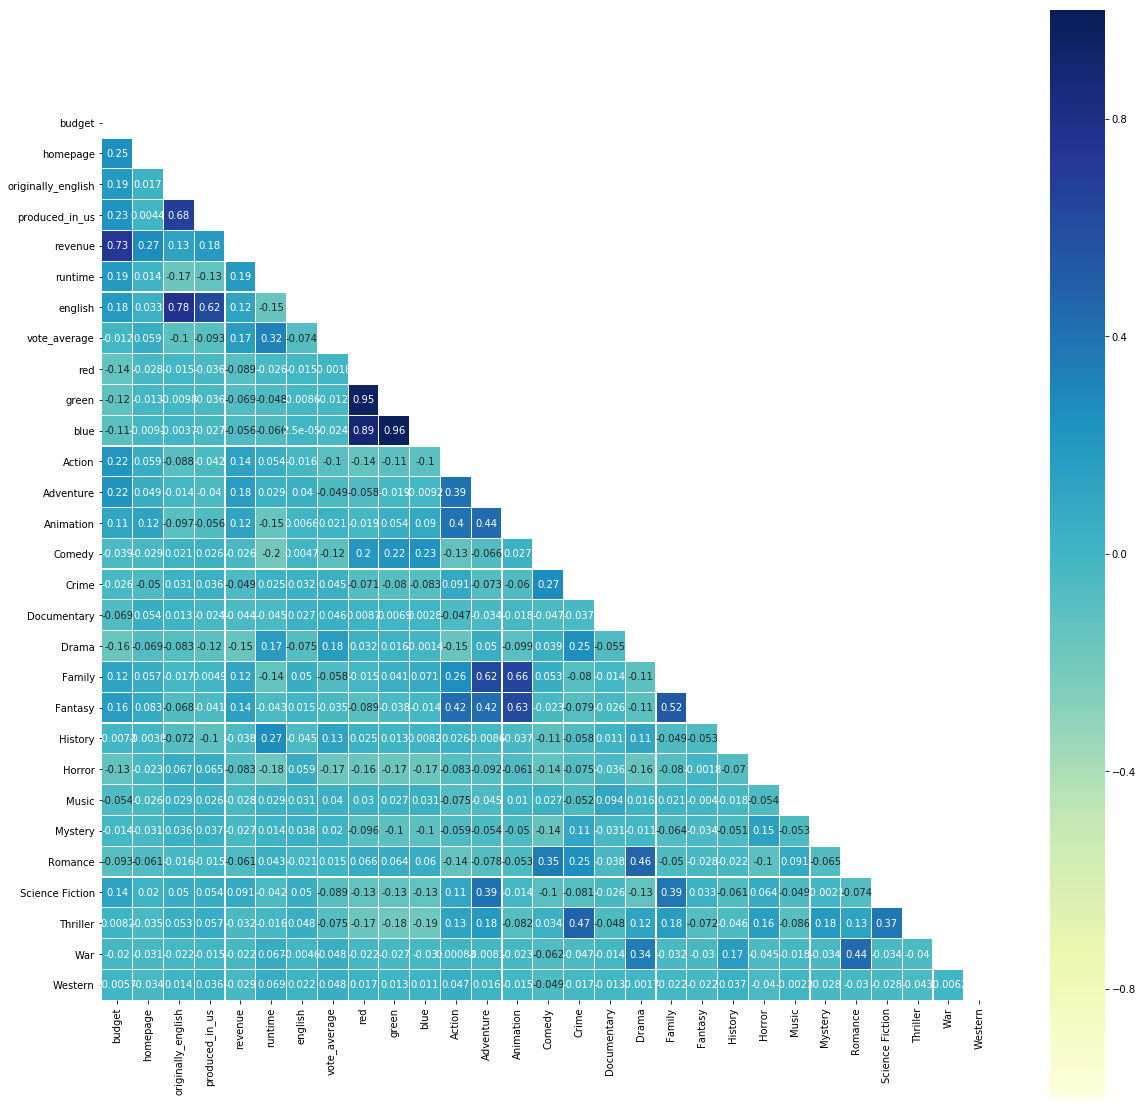

In [9]:
# A quick heatmap.
corr = movie_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20, 20))
_ = sns.heatmap(corr, vmax=1, vmin=-1, mask=mask, square=True, annot=True, linewidths=0.2, center=0, cmap="YlGnBu")

In [10]:
makeCSV(movie_df, 'basic_df.csv')

## Posters

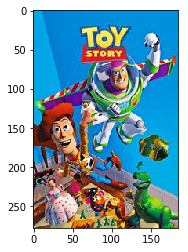

In [12]:
image = get_image(movie_df.loc[862, 'poster_path'])
imshow(image)
plt.show()

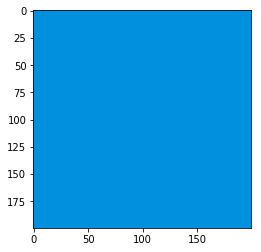

In [13]:
sample_color = print_color(862)
# Look at that, the conversion from poster most frequent color
# to columns of RGB worked.
# This is the most frequent color in the poster for Toy Story

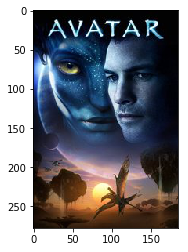

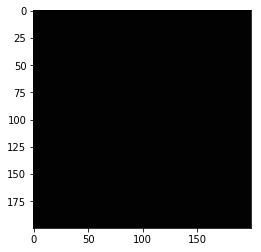

(2, 2, 2)


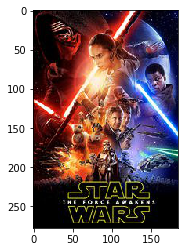

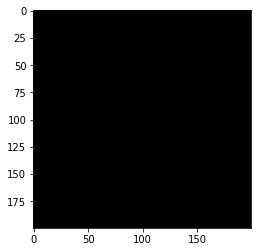

(0, 0, 0)


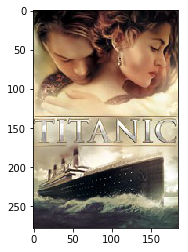

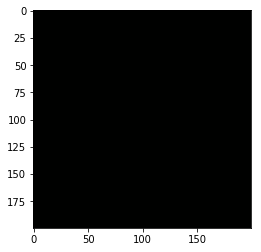

(0, 1, 0)


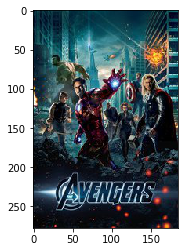

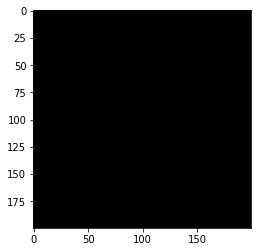

(0, 0, 0)


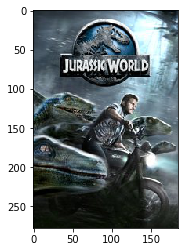

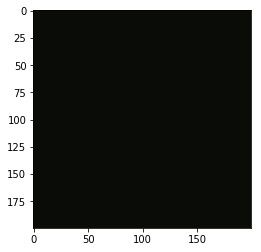

(10, 12, 7)


In [14]:
for index, row in movie_df.nlargest(5, 'revenue').iterrows():
    image = get_image(row['poster_path'])
    imshow(image)
    plt.show()
    color = print_color(index)
    print(color)

In [15]:
backup = movie_df

## Not Posters

In [16]:
movie_df = backup

In [17]:
# Function to truncate a list to the first 3 elements
def trunc_billing(cast):
    if len(cast) < 3:
        return cast
    else:
        return cast[0:3]
    
# Function to remove all duplicates from a list while retaining order.
def remove_dups(mylist):
    return sorted(set(mylist), key=lambda x: mylist.index(x))

def prep(mylist):
    mylist = remove_dups(mylist)
    return trunc_billing(mylist)

In [18]:
## Truncate the the top 3 billed actors and crew. Cast order matches Wikipedia, not sure what order it is though.
movie_df['cast'] = movie_df['cast'].apply(prep)
movie_df['crew'] = movie_df['crew'].apply(prep)

## Drop poster path
movie_df = movie_df.drop('poster_path', axis = 1)

In [19]:
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'], format = '%m/%d/%Y', errors='coerce')
# Convert release dates to Gregorian ordinal format
movie_df['release_date'] = movie_df['release_date'].apply(pd.Timestamp.toordinal)

In [20]:
# Make belongs_to_collection the size of the franchise, there are too many to deal with
zerocount = movie_df['belongs_to_collection'].value_counts()[0]
movie_df['belongs_to_collection'] = movie_df['belongs_to_collection'].map(movie_df['belongs_to_collection'].value_counts())
movie_df.loc[movie_df['belongs_to_collection'] == zerocount, 'belongs_to_collection'] = 0

In [21]:
# Take care of NaNs generated by the get_dummies functions
for column in movie_df.columns:
    movie_df[column].fillna(0, inplace=True)
movie_df.loc[:,'Action':] = movie_df.loc[:,'Action':].astype(np.int64)

#### One Hot Encoding Options

In [22]:
## ONE HOT ENCODE PRODUCTION COMPANIES ##
test = pd.get_dummies(movie_df['production_companies'].apply(pd.Series).stack()).sum(level=0)
print("New Features:", test.shape)
dropping = []
for col in test.columns:
    if test[col].sum() < 45:
        dropping.append(col)
test = test.drop(dropping, axis=1)
print("Remaining at the cutoff of 45 or more: ", test.shape)
#print(test.columns)

New Features: (5184, 5430)
Remaining at the cutoff of 45 or more:  (5184, 27)


In [23]:
## MERGE TEST INTO MOVIE_DF
print(movie_df.shape)
movie_df = pd.concat((movie_df, test), axis = 1)
movie_df = movie_df.drop('production_companies', axis = 1)
print(movie_df.shape)

(5432, 38)
(5432, 64)


In [24]:
## ONE HOT ENCODE ACTORS ##
test = pd.get_dummies(movie_df['cast'].apply(pd.Series).stack()).sum(level=0)
print("New Features:", test.shape)
dropping = []
for col in test.columns:
    if test[col].sum() < 5:
        dropping.append(col)
# 6132 one-hot encoded actors.
# Drop it to those that have been in 5+ movies, bringing us to 789 one-hot encoded actors.
test = test.drop(dropping, axis=1)
print("One-hot encoded actors (5+ movies) by movie id:", test.shape)
#print(test.columns)

New Features: (5341, 6123)
One-hot encoded actors (5+ movies) by movie id: (5341, 788)


In [25]:
## MERGE TEST INTO MOVIE_DF
#movie_df = pd.concat((movie_df, test), axis = 1)
#movie_df = movie_df.drop('cast', axis = 1)
#print(movie_df.shape)

In [26]:
# Take care of NaNs generated by the get_dummies functions
for column in movie_df.columns:
    movie_df[column].fillna(0, inplace=True)
movie_df.loc[:,'Action':] = movie_df.loc[:,'Action':].astype(np.int64)

In [27]:
# Clean up weird non-binary values in binary features
for col in movie_df.columns[20:]:
    movie_df[col].fillna(0, inplace=True)
    movie_df.loc[movie_df[col] > 1, col] = 1

In [28]:
movie_df.head(8).transpose()
# Issues for modeling:
# overview, tagline, and title are all strings
# keywords, cast, and crew are lists

id,5,11,12,13,14,15,16,18
belongs_to_collection,0,8,2,0,0,0,2,0
budget,4000000,11000000,94000000,55000000,15000000,839727,12800000,90000000
homepage,0,1,1,0,1,0,0,0
originally_english,1,1,1,1,1,1,1,1
overview,It's Ted the Bellhop's first night on the job....,Princess Leia is captured and held hostage by ...,"Nemo, an adventurous young clownfish, is unexp...",A man with a low IQ has accomplished great thi...,"Lester Burnham, a depressed suburban father in...","Newspaper magnate, Charles Foster Kane is take...","Selma, a Czech immigrant on the verge of blind...","In 2257, a taxi driver is unintentionally give..."
produced_in_us,1,1,1,1,1,1,1,0
release_date,728636,721864,731365,728115,730012,708690,730257,729151
revenue,4.3e+06,7.75398e+08,9.40336e+08,6.77945e+08,3.56297e+08,2.32177e+07,4.00319e+07,2.6392e+08
runtime,98,121,100,142,122,119,140,126
english,1,1,1,1,1,1,1,1


In [29]:
makeCSV(movie_df, 'colors.csv')

## Initial Models  

I'm just going to put the modeling helper functions I made for the midterm here for now.

In [30]:
from sklearn.model_selection import train_test_split

revenue_df = movie_df['revenue']
vote_df = movie_df['vote_average']
df = movie_df.drop(['revenue', 'vote_average'], axis=1)
## TEMP ITEM ##
df = df.drop(['overview', 'tagline', 'title', 'keywords', 'cast', 'crew'], axis=1)

train_df, test_data, revenue_df, test_revenue = train_test_split(df, revenue_df, test_size=None, random_state=42)
print("Train: ", train_df.shape)
print("Test: ", test_data.shape)
print("Revenue: ", revenue_df.shape, test_revenue.shape)

Train:  (4074, 56)
Test:  (1358, 56)
Revenue:  (4074,) (1358,)


In [31]:
from sklearn.model_selection import GridSearchCV

def getCSV(prediction,filename):
    submission = pd.DataFrame({"id":test_revenue.index, "revenue":prediction})
    submission = submission[['id', 'revenue']]
    submission.to_csv(('./models/' + filename), index = False)

def getPred(model, params, filename):
    cv = GridSearchCV(model, params, scoring='neg_mean_squared_error') #Scoring TBD
    cv.fit(train_df, revenue_df)
    print("in", filename, "best parameters:", cv.best_params_, "with score of", cv.best_score_)
    pred = cv.best_estimator_.predict(test_data)
    getCSV(pred, filename)
    return pred

In [32]:
# After deciding what to do with the features, we essentially just make a ton of these with different models.
import xgboost as xgb

params = {
    #'max_depth': [4],
    'learning_rate': [0.01]
    #'n_estimators': [500],
}

prediction = getPred(xgb.XGBRegressor(), params, 'xgb_pred.csv')

C:\Users\chris\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


in xgb_pred.csv best parameters: {'learning_rate': 0.01} with score of -1.54885449977e+16


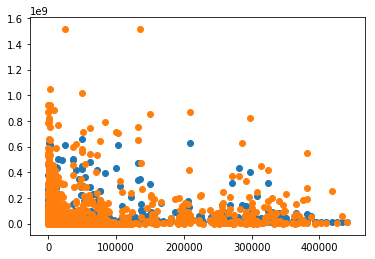

In [33]:
plt.scatter(test_revenue.index, prediction)
plt.scatter(test_revenue.index, test_revenue)